# Heatmap for each class of effector using CNN-GRU models


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from tensorflow.compat.v1.keras.models import load_model

In [2]:
import cv2
import glob

In [39]:
# Get the pretarined model and show the summary of the model
model_cnn_gru = load_model("../../r-scripts/getting-data-current/multi-class-data/data-sets/models/bacteria/cnn-gru/sequential_1.30-0.27.hdf5")
model_cnn_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4033, 16)          656       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1344, 16)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16)                1200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________


# Function

In [3]:
# Load datasets
dataset = np.load('../../r-scripts/getting-data-current/multi-class-data/data-sets/bacteria/x_train.npy')

In [4]:
def get_sum_heatmap_from_files(data_name, class_eff, layer, verbose = True, dataset = dataset):
    npy_loading_pattern = "new_results/all_matrices_" + class_eff + "_" + data_name + "_" + layer + "*.npy"
    data_loading_path = glob.glob(npy_loading_pattern)
    
    if verbose: print("Loading", data_name, "data from", len(data_loading_path) ,"files...")
    
    # Initalize empty matrix
    all_matrices = np.empty([0 , 1, np.load(data_loading_path[0]).shape[2]])

    # Append matrices from files
    for path in data_loading_path:
        data = np.load(path)
        all_matrices = np.concatenate((all_matrices, data))
        
    if verbose: print("Loaded", all_matrices.shape[0], "data samples")
    sum_all_matrices = np.sum(all_matrices, axis = 0)
    
    # Calculate heatmap
    heatmap = np.maximum(sum_all_matrices, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (dataset.shape[1], dataset.shape[2]))

    
    return(heatmap)

In [5]:
def plot_heatmap(data, from_data, to_data, colorbar = None):
    plt.matshow(data[:,from_data:to_data], cmap = 'viridis', origin = "lower", vmin = 0, vmax = 1)
    ax = plt.gca()
    plot = ax.axes.get_yaxis().set_visible(False)
    if colorbar == "Yes":
        plt.colorbar()
    
    return plot

## Bacteria

In [6]:
x_train_bacteria_gru = get_sum_heatmap_from_files("x_train", "bacteria", "conv1d_1")

Loading x_train data from 1 files...
Loaded 228 data samples


In [7]:
x_val_bacteria_gru = get_sum_heatmap_from_files("x_val", "bacteria", "conv1d_1")

Loading x_val data from 1 files...
Loaded 76 data samples


In [8]:
x_test_bacteria_gru = get_sum_heatmap_from_files("x_test", "bacteria", "conv1d_1")

Loading x_test data from 1 files...
Loaded 76 data samples


### Plot the training data

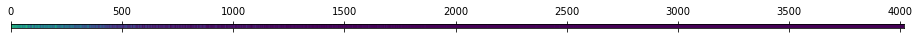

In [9]:
plot_heatmap(x_train_bacteria_gru, x_train_bacteria_gru.shape[0], x_train_bacteria_gru.shape[1])

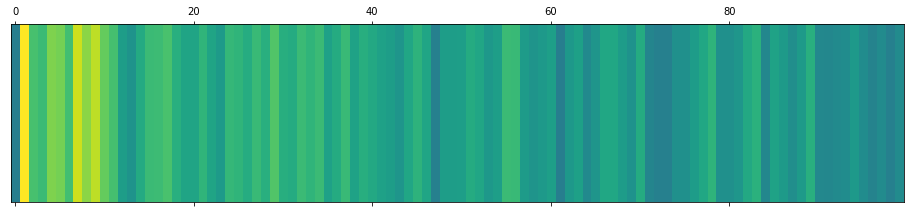

In [40]:
plot_heatmap(x_train_bacteria_gru, 0, 100)

### Plot the validation data

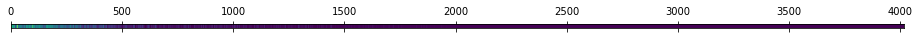

In [11]:
plot_heatmap(x_val_bacteria_gru, x_val_bacteria_gru.shape[0], x_val_bacteria_gru.shape[1])

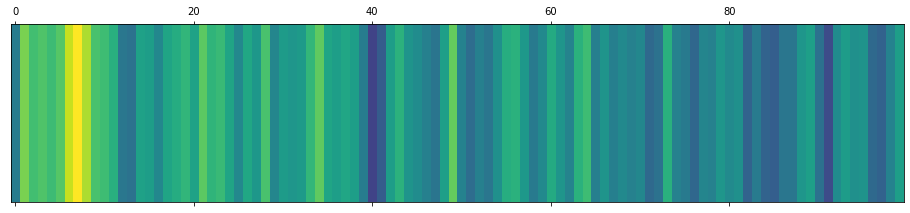

In [41]:
plot_heatmap(x_val_bacteria_gru, 0, 100)

### Plot the testing data

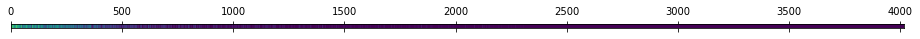

In [15]:
plot_heatmap(x_test_bacteria_gru, x_test_bacteria_gru.shape[0], x_test_bacteria_gru.shape[1])

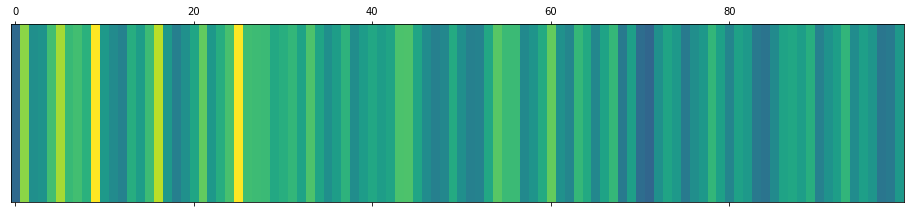

In [42]:
plot_heatmap(x_test_bacteria_gru, 0, 100)

## Fungi

In [17]:
x_train_fungi_gru = get_sum_heatmap_from_files("x_train", "fungi", "conv1d_1")

Loading x_train data from 1 files...
Loaded 135 data samples


In [18]:
x_val_fungi_gru = get_sum_heatmap_from_files("x_val", "fungi", "conv1d_1")

Loading x_val data from 1 files...
Loaded 45 data samples


In [19]:
x_test_fungi_gru = get_sum_heatmap_from_files("x_test", "fungi", "conv1d_1")

Loading x_test data from 1 files...
Loaded 44 data samples


### Plot the training data

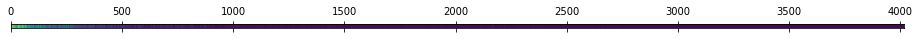

In [21]:
plot_heatmap(x_train_fungi_gru, x_train_fungi_gru.shape[0], x_train_fungi_gru.shape[1])

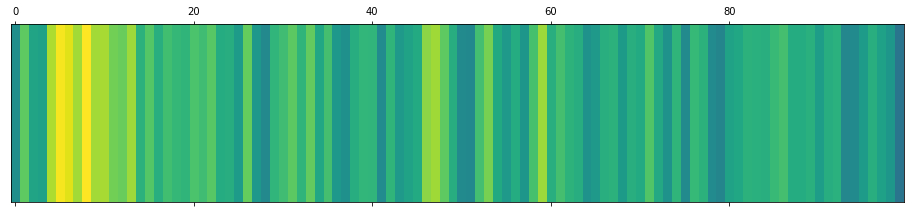

In [22]:
plot_heatmap(x_train_fungi_gru, 0, 100)

### Plot the validation data

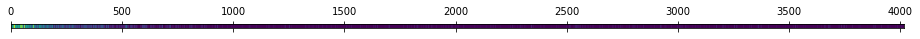

In [23]:
plot_heatmap(x_val_fungi_gru, x_val_fungi_gru.shape[0], x_val_fungi_gru.shape[1])

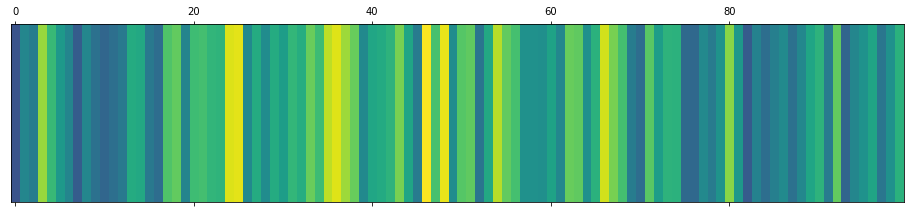

In [24]:
plot_heatmap(x_val_fungi_gru, 0, 100)

### Plot the testing data

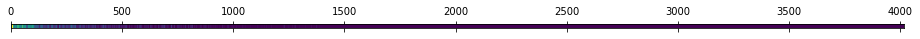

In [26]:
plot_heatmap(x_test_fungi_gru, x_test_fungi_gru.shape[0], x_test_fungi_gru.shape[1])

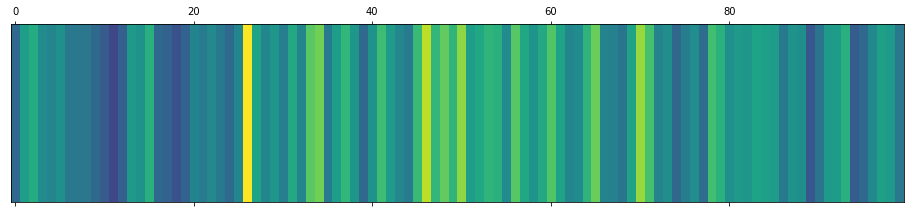

In [27]:
plot_heatmap(x_test_fungi_gru, 0, 100)

## Oomycete


In [28]:
x_train_oomycete_gru = get_sum_heatmap_from_files("x_train", "oomycete", "conv1d_1")

Loading x_train data from 1 files...
Loaded 114 data samples


In [29]:
x_val_oomycete_gru = get_sum_heatmap_from_files("x_val", "oomycete", "conv1d_1")

Loading x_val data from 1 files...
Loaded 38 data samples


In [30]:
x_test_oomycete_gru = get_sum_heatmap_from_files("x_test", "oomycete", "conv1d_1")

Loading x_test data from 1 files...
Loaded 38 data samples


### Plot the training data

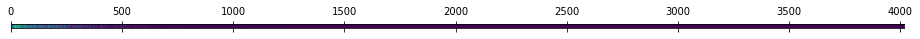

In [31]:
plot_heatmap(x_train_oomycete_gru, x_train_oomycete_gru.shape[0], x_train_oomycete_gru.shape[1])

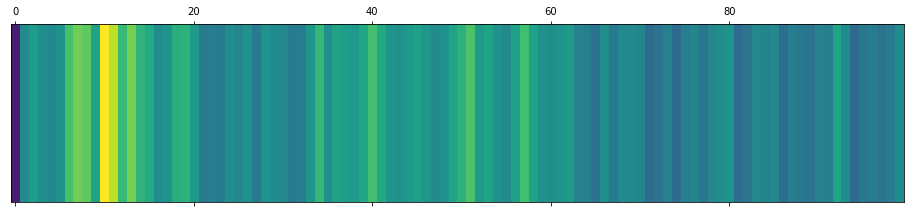

In [33]:
plot_heatmap(x_train_oomycete_gru, 0, 100)

### Plot the validation data

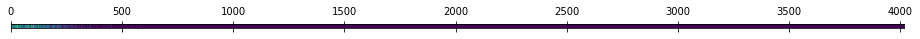

In [34]:
plot_heatmap(x_val_oomycete_gru, x_val_oomycete_gru.shape[0], x_val_oomycete_gru.shape[1])

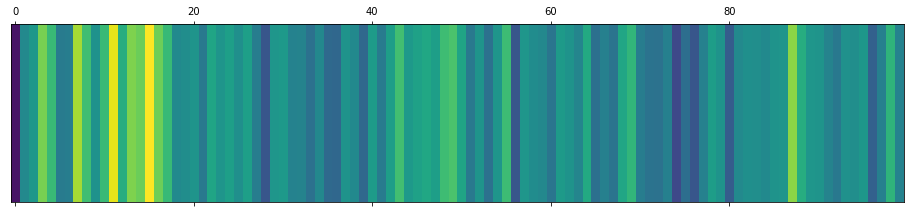

In [35]:
plot_heatmap(x_val_oomycete_gru, 0, 100)

### Plot the testing data

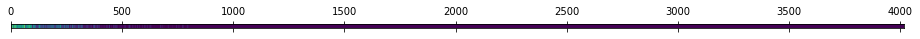

In [36]:
plot_heatmap(x_test_oomycete_gru, x_test_oomycete_gru.shape[0], x_test_oomycete_gru.shape[1])

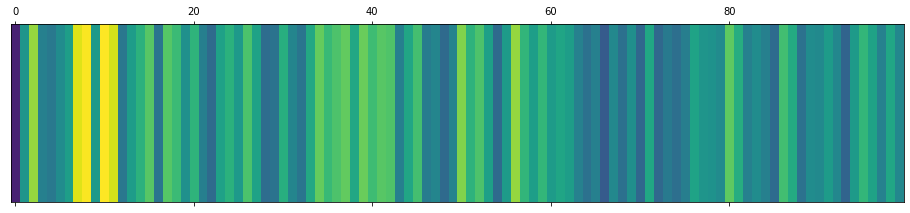

In [37]:
plot_heatmap(x_test_oomycete_gru, 0, 100)